In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings("ignore")
%matplotlib inline

# 讀取數據
train = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\無氣提.csv") 

print (train)
train.head(5)



     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  7.03  35.0                     -          NaN                  NaN   
1       1  7.08  35.0                   43%        12.47                  NaN   
2       2  7.22  35.0                   53%        12.47               108.97   
3       3  7.22  35.0                   50%        12.47                  NaN   
4       4  7.24  35.0                   49%        12.47               108.97   
..    ...   ...   ...                   ...          ...                  ...   
204   223  7.29  34.0                   70%        14.43               128.50   
205   224  7.15  35.0                   68%        14.43                  NaN   
206   225  7.31  35.0                   69%        14.43               128.50   
207   226  7.29  35.0                   69%        14.43                  NaN   
208   227   NaN   NaN                   NaN          NaN                  NaN   

     Influent SCOD(g/L)  SC

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,7.03,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.08,35.0,43%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.27,107.0,0.63,251.0
2,2,7.22,35.0,53%,12.47,108.97,16.41,16.41,74.94,31.0,...,60.37,40.57,67%,44.0,38.0,2.17,0.26,106.0,0.50,202.0
3,3,7.22,35.0,50%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.23,91.0,0.45,181.0
4,4,7.24,35.0,49%,12.47,108.97,16.41,17.33,61.65,43.0,...,47.85,30.82,64%,56.0,53.0,2.17,0.16,66.0,0.33,134.0


In [27]:
test = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\氣提.csv")

print (test)
test.head(5)

     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  6.99  35.0                     -          NaN                  NaN   
1       1  7.30  35.0                   59%        12.47                  NaN   
2       2  7.27  35.0                   63%        12.47               108.97   
3       3  7.28  35.0                   56%        12.47                  NaN   
4       4  7.22  35.0                   59%        12.47               108.97   
..    ...   ...   ...                   ...          ...                  ...   
204   223  7.40  35.0                   68%        14.43               128.50   
205   224  7.38  35.0                   70%        14.43                  NaN   
206   225  7.39  24.0                   73%        14.43               128.50   
207   226  7.34  35.0                   68%        14.43                  NaN   
208   227   NaN   NaN                   NaN          NaN               128.50   

     Influent SCOD(g/L)  SC

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,6.99,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.30,35.0,59%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.37,149.0,0.63,251.0
2,2,7.27,35.0,63%,12.47,108.97,16.41,13.05,70.66,35.0,...,28.02,17.5,62%,74.0,73.0,2.17,0.12,47.0,0.19,74.0
3,3,7.28,35.0,56%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.13,52.0,0.23,93.0
4,4,7.22,35.0,59%,12.47,108.97,16.41,14.82,58.58,46.0,...,29.13,17.8,61%,73.0,73.0,2.17,0.12,47.0,0.20,79.0


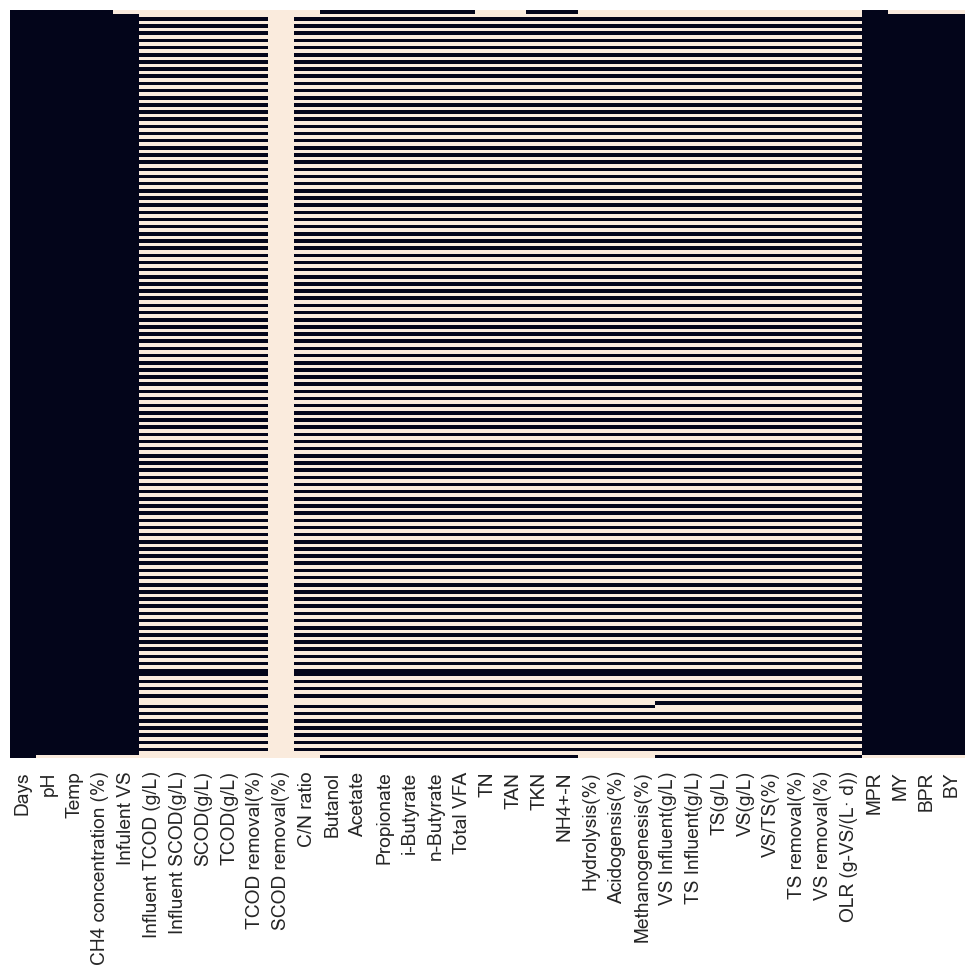

In [28]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [29]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    103 non-null    float64
 6   Influent SCOD(g/L)     103 non-null    float64
 7   SCOD(g/L)              103 non-null    float64
 8   TCOD(g/L)              103 non-null    float64
 9   TCOD removal(%)        103 non-null    float64
 10  SCOD removal(%)        0 non-null      float64
 11  C/N ratio              103 non-null    float64
 12  Butanol                105 non-null    float64
 13  Acetate                105 non-null    float64
 14  Propionate             105 non-null    float64
 

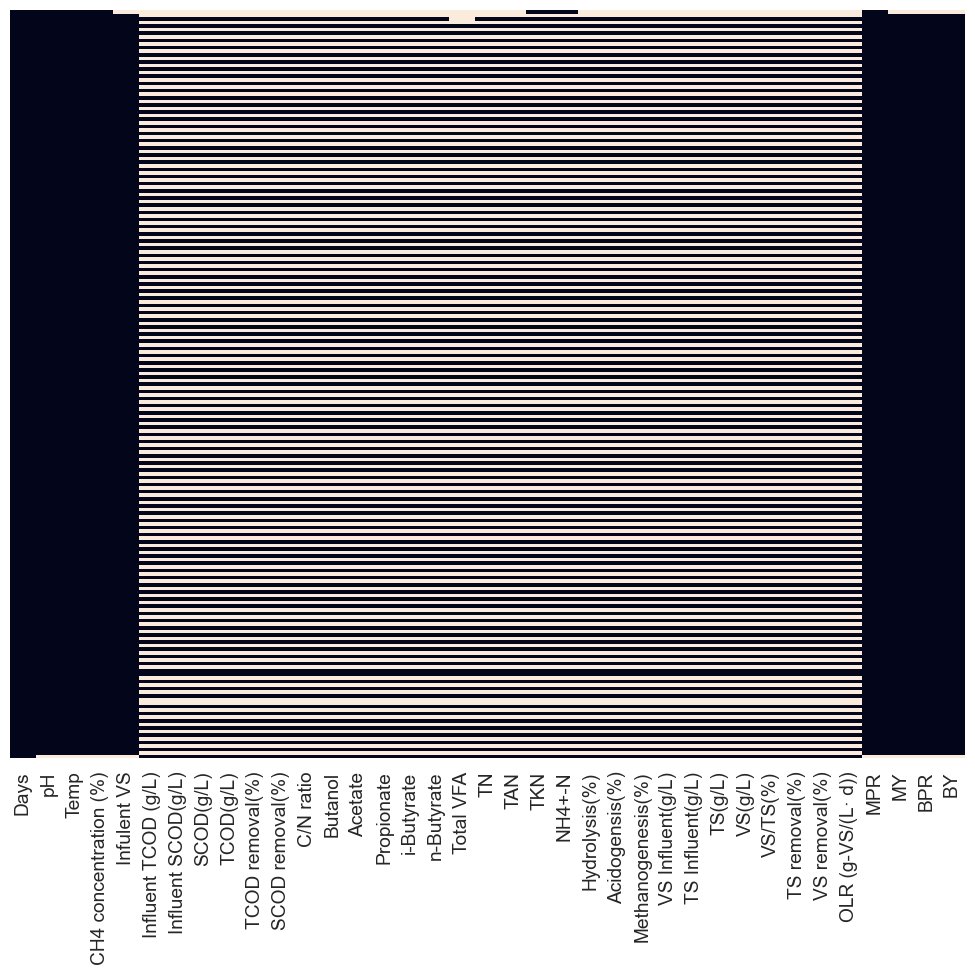

In [30]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [31]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    104 non-null    float64
 6   Influent SCOD(g/L)     104 non-null    float64
 7   SCOD(g/L)              104 non-null    float64
 8   TCOD(g/L)              104 non-null    float64
 9   TCOD removal(%)        104 non-null    float64
 10  SCOD removal(%)        104 non-null    float64
 11  C/N ratio              104 non-null    float64
 12  Butanol                104 non-null    float64
 13  Acetate                104 non-null    float64
 14  Propionate             104 non-null    float64
 

In [32]:
# ND轉換NA
train = train.replace("ND", pd.NA)
test = test.replace("ND" , pd.NA)

# 將百分比轉換為數值
percentage_cols = ["SCOD removal(%)", "TCOD removal(%)", "C/N ratio", "Hydrolysis(%)", "Acidogensis(%)", "Methanogenesis(%)", "VS/TS(%)", "TS removal(%)", "VS removal(%)", "CH4 concentration (%)"]
for col in percentage_cols:
    # 確保所有值為字串型態
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    # 如果該值包含數字和%，則將 "%" 字符去掉並轉換為浮點數；否則直接轉換為浮點數
    train[col] = train[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)
    test[col] = test[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)
    
#轉換為數值型
train = train.apply(pd.to_numeric, errors='coerce')
test = test.apply(pd.to_numeric, errors='coerce')

# 使用前後的值加總除以2進行插值
train = train.interpolate(method="linear")
test = test.interpolate(method="linear")

train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)

train = train.iloc[2:].reset_index(drop=True)
test = test.iloc[2:].reset_index(drop=True)

test["Total VFA"] = test["Total VFA"].interpolate(method="linear", limit_direction="both")

# 找到缺失值的索引位置
missing_indexes = test.index[test["Total VFA"].isnull()]

# 對最前面的兩個連續缺失值進行填充
for index in missing_indexes:
    if index < 2:
        # 使用最接近的兩個非缺失值的平均值填充
        previous_value = test.loc[index-1, "Total VFA"]
        next_value = test.loc[index+1, "Total VFA"]
        average = np.mean([previous_value, next_value])
        test.loc[index, "Total VFA"] = average


#看數據維度
print(train.shape)
print(test.shape)


(207, 37)
(207, 37)


In [33]:
print (train)
train.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       2  7.22  35.0                   0.53        12.47   
1       3  7.22  35.0                   0.50        12.47   
2       4  7.24  35.0                   0.49        12.47   
3       5  7.24  35.0                   0.49        12.47   
4       6  7.25  35.0                   0.48        12.47   
..    ...   ...   ...                    ...          ...   
202   223  7.29  34.0                   0.70        14.43   
203   224  7.15  35.0                   0.68        14.43   
204   225  7.31  35.0                   0.69        14.43   
205   226  7.29  35.0                   0.69        14.43   
206   227  7.29  35.0                   0.69        14.43   

     Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0                 108.97               16.41      16.41     74.940   
1                 108.97               16.41      16.87     68.295   
2                 108.97               16.41      17.33  

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,2,7.22,35.0,0.53,12.47,108.97,16.41,16.41,74.940,0.31,...,60.37,40.570,0.670,0.440,0.380,2.17,0.26,106.0,0.50,202.0
1,3,7.22,35.0,0.50,12.47,108.97,16.41,16.87,68.295,0.37,...,54.11,35.695,0.655,0.500,0.455,2.17,0.23,91.0,0.45,181.0
2,4,7.24,35.0,0.49,12.47,108.97,16.41,17.33,61.650,0.43,...,47.85,30.820,0.640,0.560,0.530,2.17,0.16,66.0,0.33,134.0
3,5,7.24,35.0,0.49,12.47,108.97,16.41,17.61,60.800,0.44,...,47.28,29.735,0.625,0.565,0.545,2.17,0.13,51.0,0.26,103.0
4,6,7.25,35.0,0.48,12.47,108.97,16.41,17.89,59.950,0.45,...,46.71,28.650,0.610,0.570,0.560,2.17,0.11,46.0,0.24,95.0


In [34]:
print (test)
test.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       2  7.27  35.0                   0.63        12.47   
1       3  7.28  35.0                   0.56        12.47   
2       4  7.22  35.0                   0.59        12.47   
3       5  7.25  35.0                   0.60        12.47   
4       6  7.23  35.0                   0.51        12.47   
..    ...   ...   ...                    ...          ...   
202   223  7.40  35.0                   0.68        14.43   
203   224  7.38  35.0                   0.70        14.43   
204   225  7.39  24.0                   0.73        14.43   
205   226  7.34  35.0                   0.68        14.43   
206   227  7.34  35.0                   0.68        14.43   

     Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0                 108.97               16.41     13.050     70.660   
1                 108.97               16.41     13.935     64.620   
2                 108.97               16.41     14.820  

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,2,7.27,35.0,0.63,12.47,108.97,16.41,13.050,70.660,0.350,...,28.020,17.50,0.620,0.740,0.73,2.17,0.12,47.0,0.19,74.0
1,3,7.28,35.0,0.56,12.47,108.97,16.41,13.935,64.620,0.405,...,28.575,17.65,0.615,0.735,0.73,2.17,0.13,52.0,0.23,93.0
2,4,7.22,35.0,0.59,12.47,108.97,16.41,14.820,58.580,0.460,...,29.130,17.80,0.610,0.730,0.73,2.17,0.12,47.0,0.20,79.0
3,5,7.25,35.0,0.60,12.47,108.97,16.41,13.585,55.805,0.485,...,29.155,17.61,0.605,0.730,0.73,2.17,0.10,42.0,0.17,70.0
4,6,7.23,35.0,0.51,12.47,108.97,16.41,12.350,53.030,0.510,...,29.180,17.42,0.600,0.730,0.73,2.17,0.09,38.0,0.18,74.0


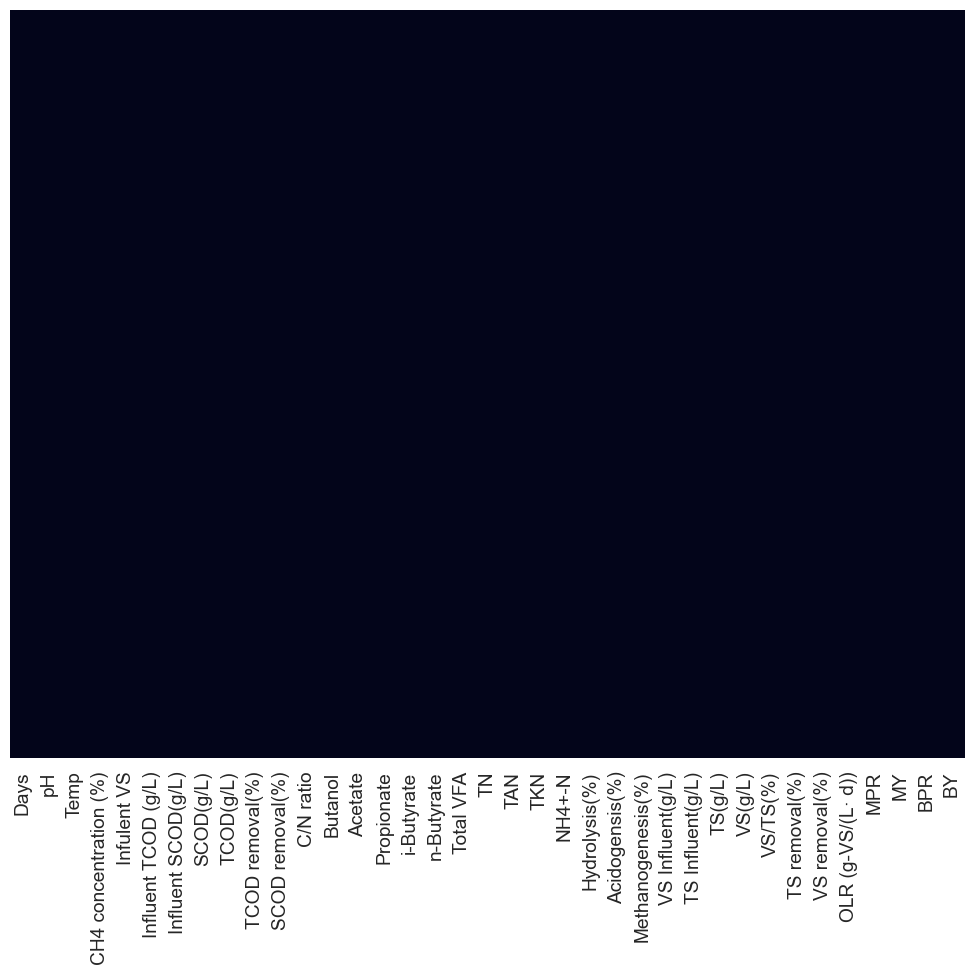

In [35]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [36]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

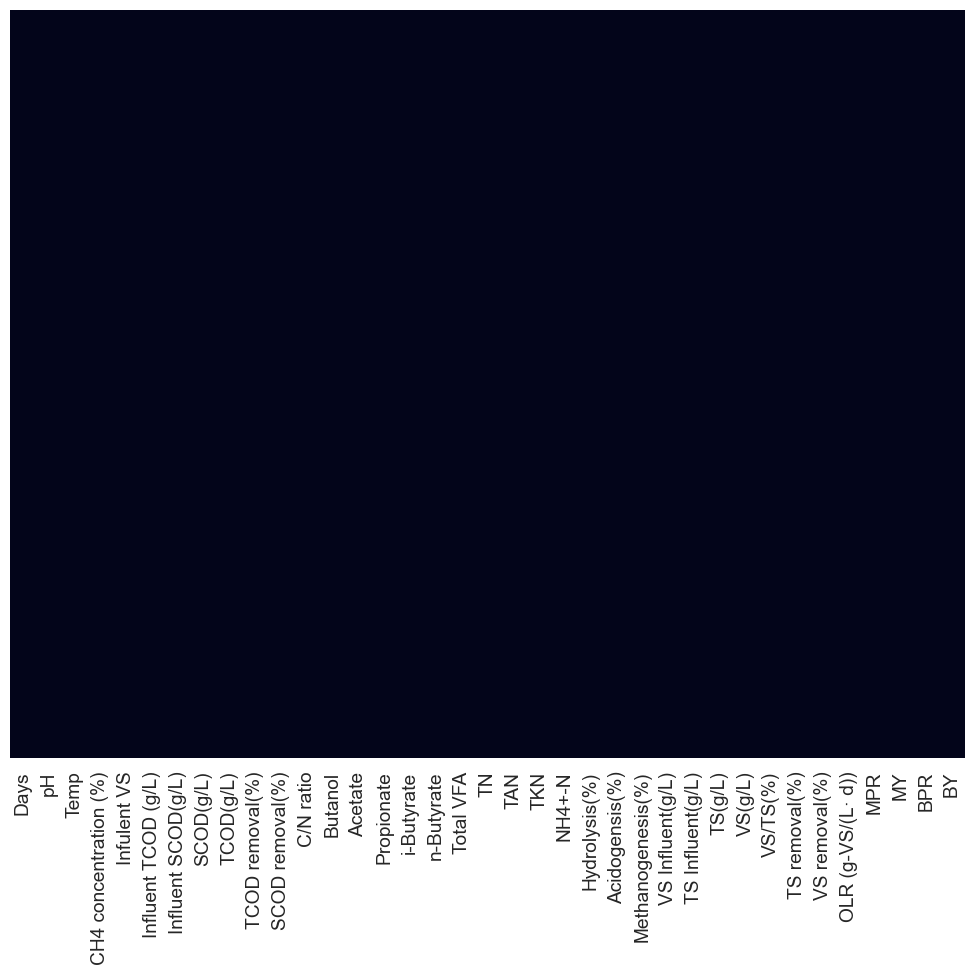

In [37]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [38]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

In [39]:
#數值型數據
numeric_cols_train = train.columns[train.dtypes !='object']
numeric_cols_train

numeric_cols_test = test.columns[test.dtypes !='object']
numeric_cols_test

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')

In [40]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_test_mean =test.loc[: ,numeric_cols_test].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_test_std = test.loc[: ,numeric_cols_test].std() #std() 函式計算數值型特徵的標準差
test.loc[: ,numeric_cols_test] = (test.loc[: ,numeric_cols_test] - numeric_cols_test_mean)/numeric_cols_test_std #轉換後的數值型特徵資料儲存在 test 變數中

In [41]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_train_mean =train.loc[: ,numeric_cols_train].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_train_std = train.loc[: ,numeric_cols_train].std() #std() 函式計算數值型特徵的標準差
train.loc[: ,numeric_cols_train] = (train.loc[: ,numeric_cols_train] - numeric_cols_train_mean)/numeric_cols_train_std #轉換後的數值型特徵資料儲存在 train 變數中

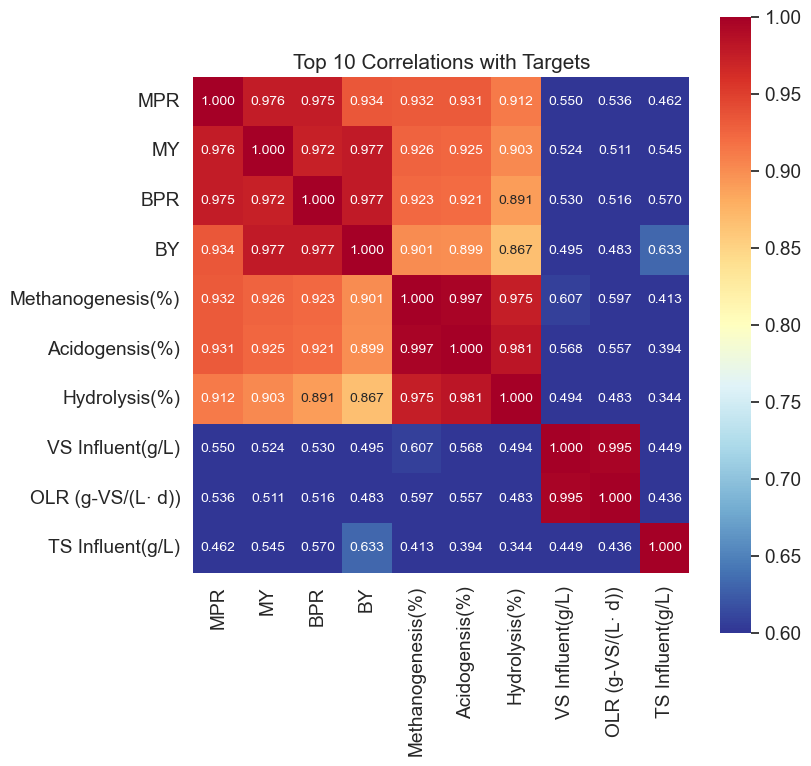

In [42]:
targets = ["MPR", "MY", "BPR", "BY"]
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, targets)[targets].index
cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlBu_r', vmin=0.6, vmax=1.0)
plt.title(f"Top {k} Correlations with Targets")
plt.show()


In [43]:
# #對分類變量編碼
# from sklearn.preprocessing import LabelEncoder
# cols = ('Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#                      'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#                      'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#                      'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#                      'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#                      'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#                      'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
#                      'MPR', 'MY', 'BPR', 'BY')

# for c in cols:
#     lbl = LabelEncoder() 
#     lbl.fit(list(train[c].values)) 
#     train[c] = lbl.transform(list(train[c].values))

# for c in cols:
#     lbl = LabelEncoder() 
#     lbl.fit(list(test[c].values)) 
#     test[c] = lbl.transform(list(test[c].values))    

# #查看數據維度        
# print('Shape all_data: {}'.format(train.shape))
# print('Shape all_data: {}'.format(test.shape))

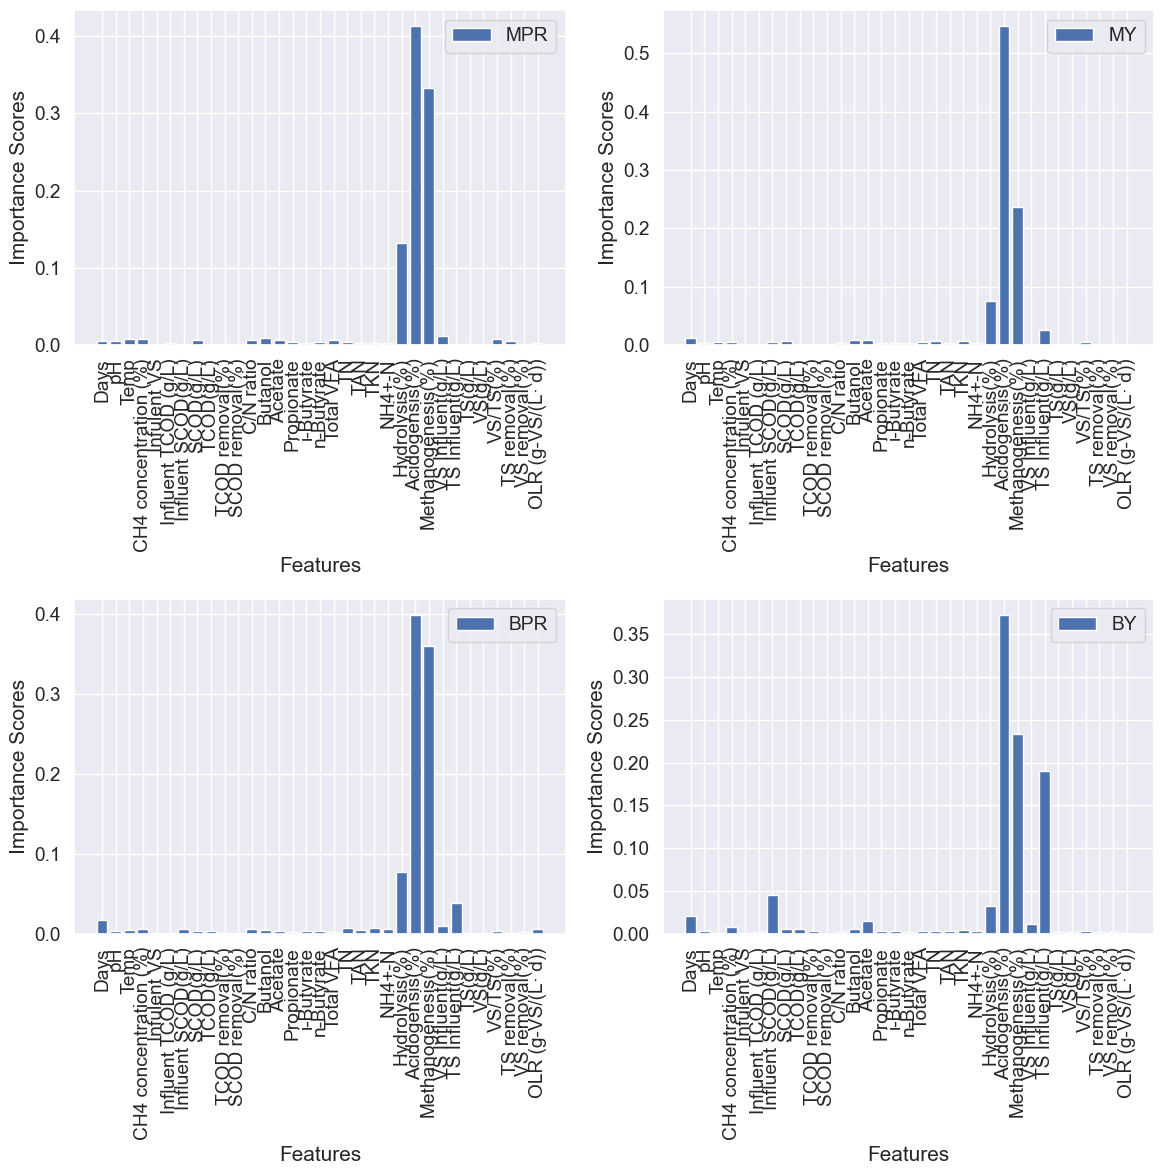

In [44]:
#隨機森林塞選變
train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, target in enumerate(targets):
    row = i // 2
    col = i % 2

    # 創建特徵和目標變量的數據集
    X = train[features]
    y = train[target]

    # 构建随機森林模型
    model = RandomForestRegressor(n_estimators=100)

    # 訓練模型
    model.fit(X, y)

    # 提取變量重要性
    importance_scores = model.feature_importances_

    # 可視化變量重要性
    axes[row, col].bar(features, importance_scores, label=target)
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Importance Scores')
    axes[row, col].set_xticklabels(features, rotation=90)
    axes[row, col].legend()

plt.tight_layout()
plt.show()


In [45]:
# 將特徵進行數學轉換
train['Methanogenesis_Squared'] = np.square(train['Methanogenesis(%)']) #平方
train['Methanogenesis_SquareRoot'] = np.sqrt(train['Methanogenesis(%)']) #平方根
train['Methanogenesis_Log'] = np.log(train['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

train['Acidogensis_Squared'] = np.square(train['Acidogensis(%)']) #平方
train['Acidogensis_SquareRoot'] = np.sqrt(train['Acidogensis(%)']) #平方根
train['Acidogensis_Log'] = np.log(train['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

train['Hydrolysis_Squared'] = np.square(train['Hydrolysis(%)'])  # 平方
train['Hydrolysis_SquareRoot'] = np.sqrt(train['Hydrolysis(%)'])  # 平方根
train['Hydrolysis_Log'] = np.log(train['Hydrolysis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
train['Interaction_Meth_Hydro'] = train['Methanogenesis(%)'] * train['Hydrolysis(%)'] #兩變數相乘
train['Interaction_Meth_Acido'] = train['Methanogenesis(%)'] * train['Acidogensis(%)'] #兩變數相乘
train['Interaction_Hydro_Acido'] = train['Hydrolysis(%)'] * train['Acidogensis(%)']  # 兩變數相乘
train['Sum_Meth_Hydro'] = train['Methanogenesis(%)'] + train['Hydrolysis(%)'] #兩變數相加
train['Sum_Meth_Acido'] = train['Methanogenesis(%)'] + train['Acidogensis(%)'] #兩變數相加
train['Sum_Hydro_Acido'] = train['Hydrolysis(%)'] + train['Acidogensis(%)']  # 兩變數相加
train['Ratio_Meth_Hydro'] = train['Methanogenesis(%)'] / (train['Hydrolysis(%)'] + 1)  # 除
train['Ratio_Meth_Acido'] = train['Methanogenesis(%)'] / (train['Acidogensis(%)'] + 1)  # 除
train['Ratio_Hydro_Acido'] = train['Hydrolysis(%)'] / (train['Acidogensis(%)'] + 1)  # 除
train.fillna(0, inplace=True)





# 檢查衍生特徵是否成功添加到數據集中
print(train.head())


       Days        pH      Temp  CH4 concentration (%)  Infulent VS  \
0 -1.657146 -3.246274  0.160786              -0.515205    -0.535143   
1 -1.641394 -3.246274  0.160786              -1.047555    -0.535143   
2 -1.625642 -2.911039  0.160786              -1.225005    -0.535143   
3 -1.609890 -2.911039  0.160786              -1.225005    -0.535143   
4 -1.594138 -2.743422  0.160786              -1.402455    -0.535143   

   Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0             -0.94825           -0.015232   0.822618   2.438582   
1             -0.94825           -0.015232   0.899624   1.863642   
2             -0.94825           -0.015232   0.976631   1.288701   
3             -0.94825           -0.015232   1.023504   1.215157   
4             -0.94825           -0.015232   1.070378   1.141613   

   TCOD removal(%)  ...  Hydrolysis_Log  Interaction_Meth_Hydro  \
0        -2.780417  ...             0.0                1.783259   
1        -2.205685  ...       

In [46]:
test['Methanogenesis_Squared'] = np.square(test['Methanogenesis(%)']) #平方
test['Methanogenesis_SquareRoot'] = np.sqrt(test['Methanogenesis(%)']) #平方根
test['Methanogenesis_Log'] = np.log(test['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

test['Acidogensis_Squared'] = np.square(test['Acidogensis(%)']) #平方
test['Acidogensis_SquareRoot'] = np.sqrt(test['Acidogensis(%)']) #平方根
test['Acidogensis_Log'] = np.log(test['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

test['Hydrolysis_Squared'] = np.square(test['Hydrolysis(%)'])  # 平方
test['Hydrolysis_SquareRoot'] = np.sqrt(test['Hydrolysis(%)'])  # 平方根
test['Hydrolysis_Log'] = np.log(test['Hydrolysis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
test['Interaction_Meth_Hydro'] = test['Methanogenesis(%)'] * test['Hydrolysis(%)'] #兩變數相乘
test['Interaction_Meth_Acido'] = test['Methanogenesis(%)'] * test['Acidogensis(%)'] #兩變數相乘
test['Interaction_Hydro_Acido'] = test['Hydrolysis(%)'] * test['Acidogensis(%)']  # 兩變數相乘
test['Sum_Meth_Hydro'] = test['Methanogenesis(%)'] + test['Hydrolysis(%)'] #兩變數相加
test['Sum_Meth_Acido'] = test['Methanogenesis(%)'] + test['Acidogensis(%)'] #兩變數相加
test['Sum_Hydro_Acido'] = test['Hydrolysis(%)'] + test['Acidogensis(%)']  # 兩變數相加
test['Ratio_Meth_Hydro'] = test['Methanogenesis(%)'] / (test['Hydrolysis(%)'] + 1)  # 除
test['Ratio_Meth_Acido'] = test['Methanogenesis(%)'] / (test['Acidogensis(%)'] + 1)  # 除
test['Ratio_Hydro_Acido'] = test['Hydrolysis(%)'] / (test['Acidogensis(%)'] + 1)  # 除
test.fillna(0, inplace=True)


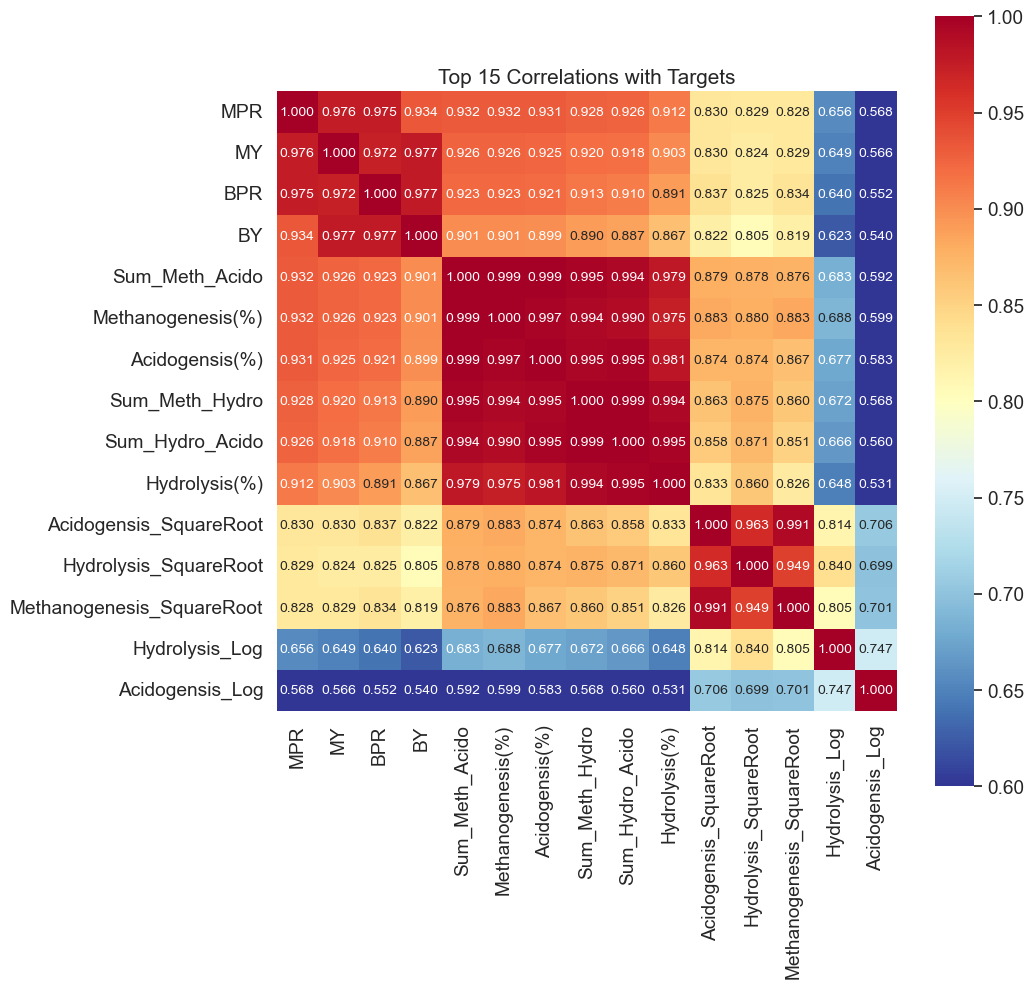

In [47]:
k = 15
corrmat = train.corr()
cols = corrmat.nlargest(k, targets)[targets].index
cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlBu_r', vmin=0.6, vmax=1.0)
plt.title(f"Top {k} Correlations with Targets")
plt.show()


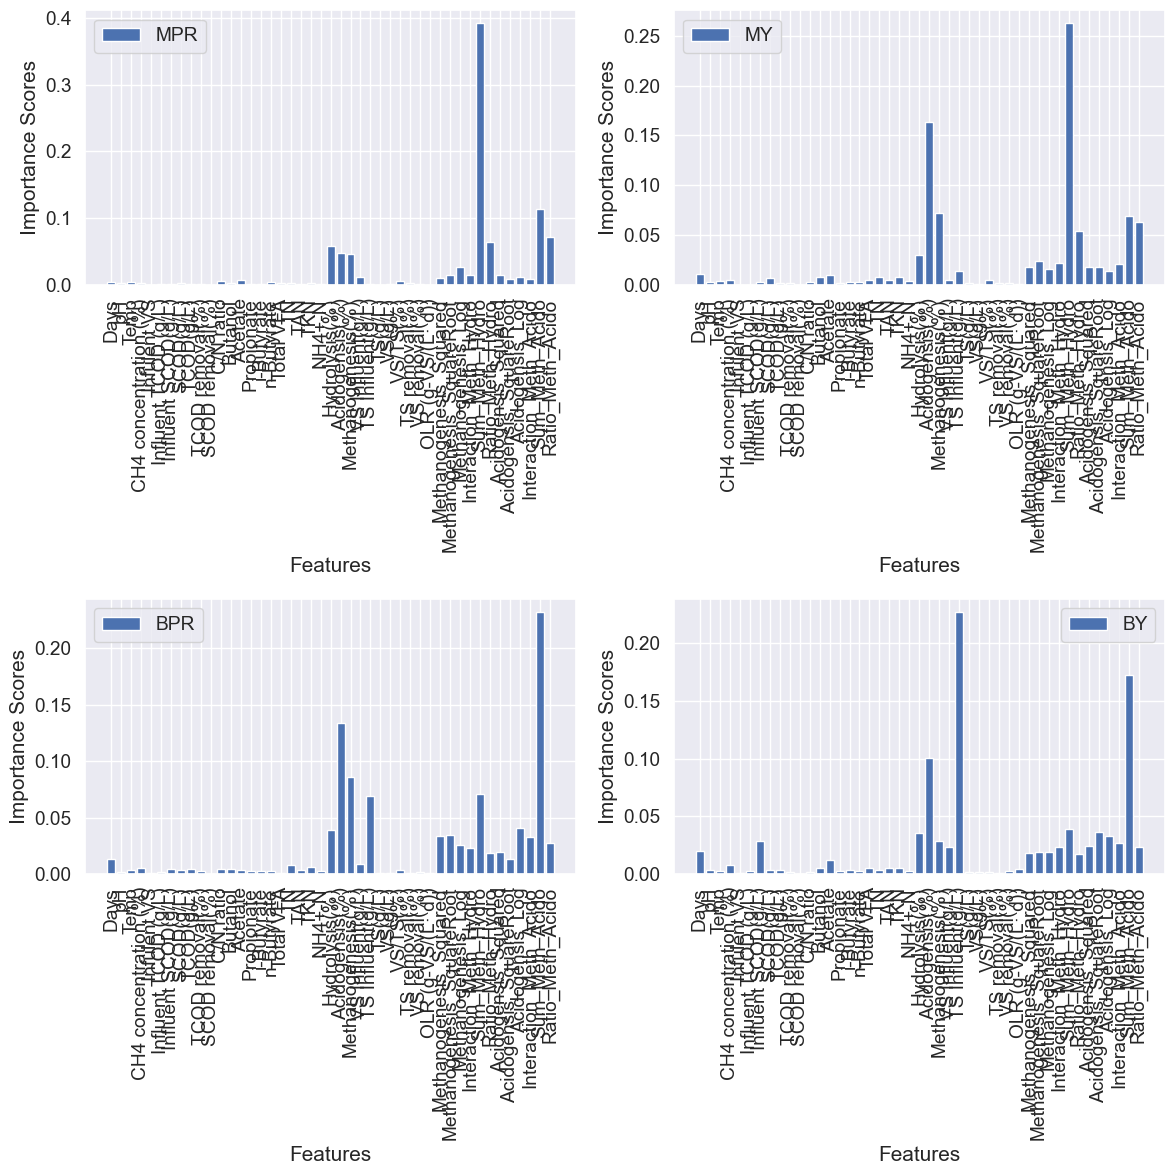

In [48]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量

target_MPR = train['MPR']
target_MY = train['MY']
target_BPR = train['BPR']
target_BY = train['BY']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, target in enumerate(targets):
    row = i // 2
    col = i % 2

    # 創建特徵和目標變量的數據集
    X = train[features]
    y = train[target]

    # 构建随機森林模型
    model = RandomForestRegressor(n_estimators=100)

    # 訓練模型
    model.fit(X, y)

    # 提取變量重要性
    importance_scores = model.feature_importances_

    # 可視化變量重要性
    axes[row, col].bar(features, importance_scores, label=target)
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Importance Scores')
    axes[row, col].set_xticklabels(features, rotation=90)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

Target: MPR


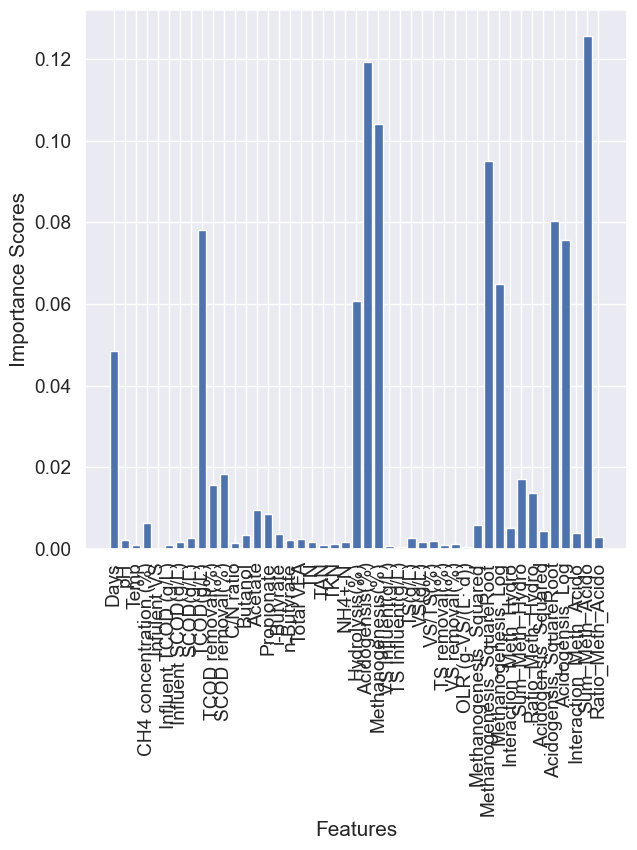

Target: MY


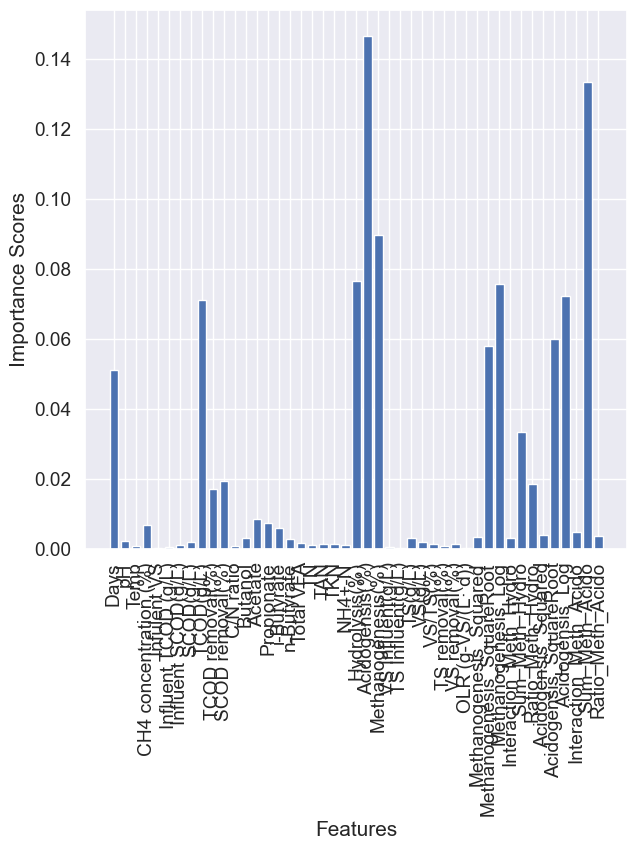

Target: BPR


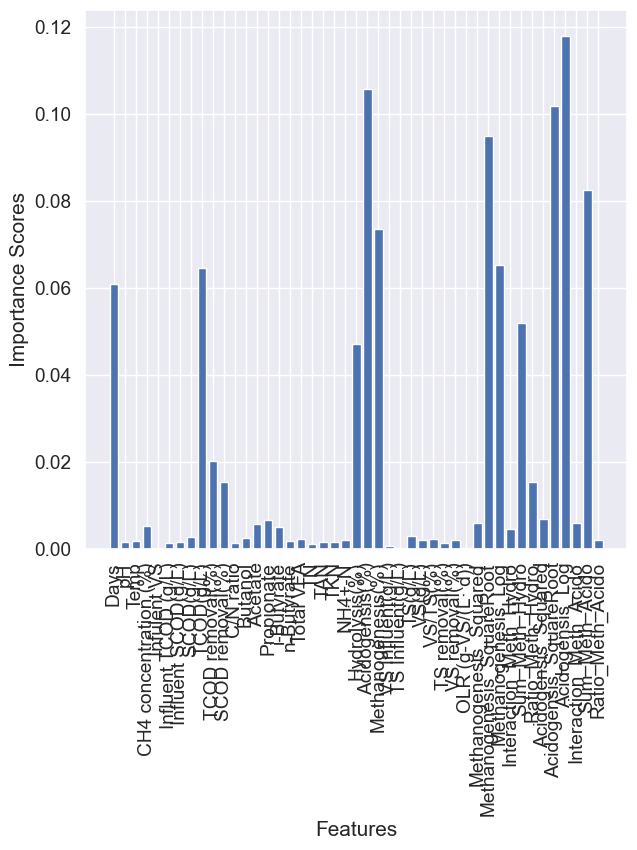

Target: BY


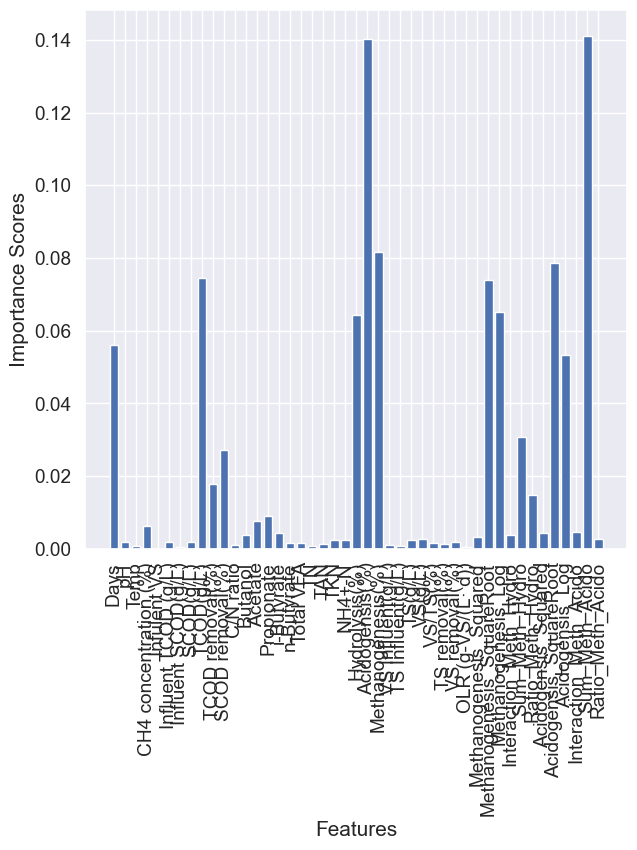

In [49]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量


test_target_MPR = test['MPR']
test_target_MY = test['MY']
test_target_BPR = test['BPR']
test_target_BY = test['BY']

for target in targets:
    print("Target:", target)
    
    # 創建特徵和目標變量的數據集
    X_test = test[features]
    y_test = test[targets]
    
    # 建構隨機森林
    model = RandomForestRegressor(n_estimators=100)
    
    # 訓練模型
    model.fit(X_test, y_test)
    
    # 提取變量重要性
    importance_scores = model.feature_importances_
    
    # 可視化變量重要性
    plt.figure(figsize=(7, 7))
    plt.bar(features, importance_scores)
    plt.xlabel('Features')
    plt.ylabel('Importance Scores')
    plt.xticks(rotation=90)
    plt.show()


In [50]:
#迭代特徵選擇
from sklearn.feature_selection import RFE

model = RandomForestRegressor(n_estimators=300)

rfe = RFE(estimator=model, n_features_to_select=10)  # 選擇保留的特徵數量

X_selected = rfe.fit_transform(X, y)

selected_feature_indexes = rfe.get_support(indices=True)
selected_features = [features[idx] for idx in selected_feature_indexes]



print("使用遞歸特徵消除 (RFE) 選擇特徵:")
print(selected_features)


使用遞歸特徵消除 (RFE) 選擇特徵:
['Influent SCOD(g/L)', 'Acidogensis(%)', 'Methanogenesis(%)', 'TS Influent(g/L)', 'Methanogenesis_Squared', 'Sum_Meth_Hydro', 'Acidogensis_SquareRoot', 'Interaction_Meth_Acido', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']


In [51]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)
scaler = RobustScaler()
X_selected_scaled = scaler.fit_transform(X_selected)
model.fit(X_selected_scaled, y)

RandomForestRegressor(n_estimators=300)

In [52]:
#導入
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, PillowWriter


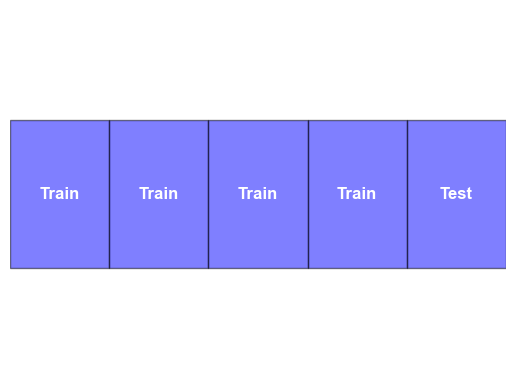

In [53]:

fig, ax = plt.subplots()

# 創建五個部分
rects = [patches.Rectangle((i*0.2, 0.3), 0.2, 0.4, edgecolor='black', facecolor='blue', alpha=0.5) for i in range(5)]
texts = [plt.text(i*0.2+0.1, 0.5, 'Train', color='white', weight='bold', size=12, ha='center', va='center') for i in range(5)]
arrows = [plt.arrow(i*0.2+0.1, 0.8, 0.2, 0, head_width=0.05, head_length=0.05, fc='k', ec='k') for i in range(4)]

for rect in rects:
    ax.add_patch(rect)

# 更新函數
def update(num):
    for i in range(5):
        texts[i].set_text('Test' if i==num else 'Train')
    for i in range(4):
        arrows[i].set_visible(i == num)

# 動畫
ani = FuncAnimation(fig, update, frames=range(5), repeat=True)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

# 保存為GIF
ani.save('cross_validation.gif', writer=PillowWriter(fps=2))

plt.show()


In [54]:
# 交叉驗證
n_folds = 5

# RMSE
def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# MAE
def mae_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kf)
    return mae

# R-squared
def r2_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    r2 = cross_val_score(model, X, y, scoring="r2", cv=kf)
    return r2


# MAPE scorer
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape_scorer = make_scorer(mape, greater_is_better=False)

def mape_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    mape = -cross_val_score(model, X, y, scoring=mape_scorer, cv=kf)
    return mape


In [55]:
# 對無氣提進行分析
# 用來儲存模型的字典
models_dict = {}

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)
    
    train_size = 0.8
    X = train[features].loc[target.index]
    y_selected = target

    # 使用train_test_split來拆分訓練集和驗證集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # 對訓練數據進行特徵選擇
    X_train_selected = rfe.fit_transform(X_train, y_train)
    # 使用同樣的特徵選擇過程來處理驗證數據
    X_valid_selected = rfe.transform(X_valid)


    # Lasso
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    lasso.fit(X_train_selected, y_train)
    train_mae = mean_absolute_error(y_train, lasso.predict(X_train_selected))
    valid_mae = mean_absolute_error(y_valid, lasso.predict(X_valid_selected))
    train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_selected)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, lasso.predict(X_valid_selected)))
    train_r2 = r2_score(y_train, lasso.predict(X_train_selected))
    valid_r2 = r2_score(y_valid, lasso.predict(X_valid_selected))
    train_mape = mape(y_train, lasso.predict(X_train_selected))
    valid_mape = mape(y_valid, lasso.predict(X_valid_selected))
    print("\nLasso Train MAE score: {:.4f}".format(train_mae))
    print("Lasso Valid MAE score: {:.4f}".format(valid_mae))
    print("Lasso Train RMSE score: {:.4f}".format(train_rmse))
    print("Lasso Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Lasso Train R^2 score: {:.4f}".format(train_r2))
    print("Lasso Valid R^2 score: {:.4f}".format(valid_r2))
    print("Lasso Train MAPE score: {:.4f}".format(train_mape))
    print("Lasso Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_lasso'] = lasso

    # ENet
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    ENet.fit(X_train_selected, y_train)
    train_mae = mean_absolute_error(y_train, ENet.predict(X_train_selected))
    valid_mae = mean_absolute_error(y_valid, ENet.predict(X_valid_selected))
    train_rmse = np.sqrt(mean_squared_error(y_train, ENet.predict(X_train_selected)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, ENet.predict(X_valid_selected)))
    train_r2 = r2_score(y_train, ENet.predict(X_train_selected))
    valid_r2 = r2_score(y_valid, ENet.predict(X_valid_selected))
    train_mape = mape(y_train, ENet.predict(X_train_selected))
    valid_mape = mape(y_valid, ENet.predict(X_valid_selected))
    print("\nElasticNet Train MAE score: {:.4f}".format(train_mae))
    print("ElasticNet Valid MAE score: {:.4f}".format(valid_mae))
    print("ElasticNet Train RMSE score: {:.4f}".format(train_rmse))
    print("ElasticNet Valid RMSE score: {:.4f}".format(valid_rmse))
    print("ElasticNet Train R^2 score: {:.4f}".format(train_r2))
    print("ElasticNet Valid R^2 score: {:.4f}".format(valid_r2))
    print("ElasticNet Train MAPE score: {:.4f}".format(train_mape))
    print("ElasticNet Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_ENet'] = ENet

    # KRR
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    KRR.fit(X_train_selected, y_train)
    train_mae = mean_absolute_error(y_train, KRR.predict(X_train_selected))
    valid_mae = mean_absolute_error(y_valid, KRR.predict(X_valid_selected))
    train_rmse = np.sqrt(mean_squared_error(y_train, KRR.predict(X_train_selected)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, KRR.predict(X_valid_selected)))
    train_r2 = r2_score(y_train, KRR.predict(X_train_selected))
    valid_r2 = r2_score(y_valid, KRR.predict(X_valid_selected))
    train_mape = mape(y_train, KRR.predict(X_train_selected))
    valid_mape = mape(y_valid, KRR.predict(X_valid_selected))
    print("\nKernel Ridge Train MAE score: {:.4f}".format(train_mae))
    print("Kernel Ridge Valid MAE score: {:.4f}".format(valid_mae))
    print("Kernel Ridge Train RMSE score: {:.4f}".format(train_rmse))
    print("Kernel Ridge Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Kernel Ridge Train R^2 score: {:.4f}".format(train_r2))
    print("Kernel Ridge Valid R^2 score: {:.4f}".format(valid_r2))
    print("Kernel Ridge Train MAPE score: {:.4f}".format(train_mape))
    print("Kernel Ridge Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_KRR'] = KRR

    # GBoost
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
    GBoost.fit(X_train_selected, y_train)
    train_mae = mean_absolute_error(y_train, GBoost.predict(X_train_selected))
    valid_mae = mean_absolute_error(y_valid, GBoost.predict(X_valid_selected))
    train_rmse = np.sqrt(mean_squared_error(y_train, GBoost.predict(X_train_selected)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, GBoost.predict(X_valid_selected)))
    train_r2 = r2_score(y_train, GBoost.predict(X_train_selected))
    valid_r2 = r2_score(y_valid, GBoost.predict(X_valid_selected))
    train_mape = mape(y_train, GBoost.predict(X_train_selected))
    valid_mape = mape(y_valid, GBoost.predict(X_valid_selected))
    print("\nGradient Boost Train MAE score: {:.4f}".format(train_mae))
    print("Gradient Boost Valid MAE score: {:.4f}".format(valid_mae))
    print("Gradient Boost Train RMSE score: {:.4f}".format(train_rmse))
    print("Gradient Boost Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Gradient Boost Train R^2 score: {:.4f}".format(train_r2))
    print("Gradient Boost Valid R^2 score: {:.4f}".format(valid_r2))
    print("Gradient Boost Train MAPE score: {:.4f}".format(train_mape))
    print("Gradient Boost Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_GBoost'] = GBoost
    
    # XGB
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
                                 learning_rate=0.05, max_depth=3,
                                 min_child_weight=1.7817, n_estimators=2200,
                                 subsample=0.5213,
                                 reg_alpha=0.4640, reg_lambda=0.8571,
                                 random_state=7, nthread=-1)
    # XGBoost
    model_xgb.fit(X_train_selected, y_train)
    train_mae = mean_absolute_error(y_train, model_xgb.predict(X_train_selected))
    valid_mae = mean_absolute_error(y_valid, model_xgb.predict(X_valid_selected))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_xgb.predict(X_train_selected)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, model_xgb.predict(X_valid_selected)))
    train_r2 = r2_score(y_train, model_xgb.predict(X_train_selected))
    valid_r2 = r2_score(y_valid, model_xgb.predict(X_valid_selected))
    train_mape = mape(y_train, model_xgb.predict(X_train_selected))
    valid_mape = mape(y_valid, model_xgb.predict(X_valid_selected))
    print("\nXgboost Train MAE score: {:.4f}".format(train_mae))
    print("Xgboost Valid MAE score: {:.4f}".format(valid_mae))
    print("Xgboost Train RMSE score: {:.4f}".format(train_rmse))
    print("Xgboost Valid RMSE score: {:.4f}".format(valid_rmse))
    print("Xgboost Train R^2 score: {:.4f}".format(train_r2))
    print("Xgboost Valid R^2 score: {:.4f}".format(valid_r2))
    print("Xgboost Train MAPE score: {:.4f}".format(train_mape))
    print("Xgboost Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_xgb'] = model_xgb

    # lgb
    model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=28,
                                  learning_rate=0.020000000000000004, n_estimators=700,
                                  max_bin=40, subsample=0.7777777777777778, subsample_freq=3,
                                  colsample_bytree=0.7777777777777778,
                                  min_child_samples=5, min_child_weight=11)

    model_lgb.fit(X_train_selected, y_train)
    train_mae = mean_absolute_error(y_train, model_lgb.predict(X_train_selected))
    valid_mae = mean_absolute_error(y_valid, model_lgb.predict(X_valid_selected))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_lgb.predict(X_train_selected)))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, model_lgb.predict(X_valid_selected)))
    train_r2 = r2_score(y_train, model_lgb.predict(X_train_selected))
    valid_r2 = r2_score(y_valid, model_lgb.predict(X_valid_selected))
    train_mape = mape(y_train, model_lgb.predict(X_train_selected))
    valid_mape = mape(y_valid, model_lgb.predict(X_valid_selected))
    print("\nLGB Train MAE score: {:.4f}".format(train_mae))
    print("LGB Valid MAE score: {:.4f}".format(valid_mae))  
    print("LGB Train RMSE score: {:.4f}".format(train_rmse))
    print("LGB Valid RMSE score: {:.4f}".format(valid_rmse))
    print("LGB Train R^2 score: {:.4f}".format(train_r2))
    print("LGB Valid R^2 score: {:.4f}".format(valid_r2))
    print("LGB Train MAPE score: {:.4f}".format(train_mape))
    print("LGB Valid MAPE score: {:.4f}".format(valid_mape))
    models_dict[target_name + '_lgb'] = model_lgb


Target: MPR

Lasso Train MAE score: 0.2218
Lasso Valid MAE score: 0.2458
Lasso Train RMSE score: 0.3635
Lasso Valid RMSE score: 0.3269
Lasso Train R^2 score: 0.8780
Lasso Valid R^2 score: 0.8257
Lasso Train MAPE score: 91.0475
Lasso Valid MAPE score: 304.0851

ElasticNet Train MAE score: 0.2218
ElasticNet Valid MAE score: 0.2460
ElasticNet Train RMSE score: 0.3635
ElasticNet Valid RMSE score: 0.3271
ElasticNet Train R^2 score: 0.8780
ElasticNet Valid R^2 score: 0.8255
ElasticNet Train MAPE score: 91.0561
ElasticNet Valid MAPE score: 304.1927

Kernel Ridge Train MAE score: 0.2074
Kernel Ridge Valid MAE score: 0.2835
Kernel Ridge Train RMSE score: 0.3480
Kernel Ridge Valid RMSE score: 0.4427
Kernel Ridge Train R^2 score: 0.8882
Kernel Ridge Valid R^2 score: 0.6804
Kernel Ridge Train MAPE score: 89.7242
Kernel Ridge Valid MAPE score: 216.5362

Gradient Boost Train MAE score: 0.0458
Gradient Boost Valid MAE score: 0.2404
Gradient Boost Train RMSE score: 0.1659
Gradient Boost Valid RMSE sco

In [56]:
# 將測試數據的特徵篩選至和訓練數據一樣的特徵
X_test_selected = X_test[selected_features]

In [57]:
# 對氣提進行分析
# 用来儲存模型的字典
models_dict_test = {}

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [test_target_MPR, test_target_MY, test_target_BPR, test_target_BY]):
    print("Target:", target_name)
    
    train_size = 0.8
    X = test[selected_features].loc[target.index]
    y_selected = target

    X_train, X_test, y_train, y_test = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # Lasso
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    lasso.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, lasso.predict(X_train))
    test_mae = mean_absolute_error(y_test, lasso.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    train_r2 = r2_score(y_train, lasso.predict(X_train))
    test_r2 = r2_score(y_test, lasso.predict(X_test))
    train_mape = mape(y_train, lasso.predict(X_train))
    test_mape = mape(y_test, lasso.predict(X_test))
    print("\nLasso Train MAE score: {:.4f}".format(train_mae))
    print("Lasso Test MAE score: {:.4f}".format(test_mae))
    print("Lasso Train RMSE score: {:.4f}".format(train_rmse))
    print("Lasso Test RMSE score: {:.4f}".format(test_rmse))
    print("Lasso Train R^2 score: {:.4f}".format(train_r2))
    print("Lasso Test R^2 score: {:.4f}".format(test_r2))
    print("Lasso Train MAPE score: {:.4f}".format(train_mape))
    print("Lasso Test MAPE score: {:.4f}".format(test_mape))
    models_dict_test[target_name + '_lasso'] = lasso
    
    # ENet
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    ENet.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, ENet.predict(X_train))
    test_mae = mean_absolute_error(y_test, ENet.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, ENet.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, ENet.predict(X_test)))
    train_r2 = r2_score(y_train, ENet.predict(X_train))
    test_r2 = r2_score(y_test, ENet.predict(X_test))
    train_mape = mape(y_train, ENet.predict(X_train))
    test_mape = mape(y_test, ENet.predict(X_test))
    print("\nElasticNet Train MAE score: {:.4f}".format(train_mae))
    print("ElasticNet Test MAE score: {:.4f}".format(test_mae))
    print("ElasticNet Train RMSE score: {:.4f}".format(train_rmse))
    print("ElasticNet Test RMSE score: {:.4f}".format(test_rmse))
    print("ElasticNet Train R^2 score: {:.4f}".format(train_r2))
    print("ElasticNet Test R^2 score: {:.4f}".format(test_r2))
    print("ElasticNet Train MAPE score: {:.4f}".format(train_mape))
    print("ElasticNet Test MAPE score: {:.4f}".format(test_mape))
    models_dict_test[target_name + '_ENet'] = ENet
    
    # KRR
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    KRR.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, KRR.predict(X_train))
    test_mae = mean_absolute_error(y_test, KRR.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, KRR.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, KRR.predict(X_test)))
    train_r2 = r2_score(y_train, KRR.predict(X_train))
    test_r2 = r2_score(y_test, KRR.predict(X_test))
    train_mape = mape(y_train, KRR.predict(X_train))
    test_mape = mape(y_test, KRR.predict(X_test))
    print("\nKernel Ridge Train MAE score: {:.4f}".format(train_mae))
    print("Kernel Ridge Test MAE score: {:.4f}".format(test_mae))
    print("Kernel Ridge Train RMSE score: {:.4f}".format(train_rmse))
    print("Kernel Ridge Test RMSE score: {:.4f}".format(test_rmse))
    print("Kernel Ridge Train R^2 score: {:.4f}".format(train_r2))
    print("Kernel Ridge Test R^2 score: {:.4f}".format(test_r2))
    print("Kernel Ridge Train MAPE score: {:.4f}".format(train_mape))
    print("Kernel Ridge Test MAPE score: {:.4f}".format(test_mape))
    models_dict_test[target_name + '_KRR'] = KRR
    
    # 梯度提升
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10,
                                       loss='huber', random_state=5)
    GBoost.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, GBoost.predict(X_train))
    test_mae = mean_absolute_error(y_test, GBoost.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, GBoost.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, GBoost.predict(X_test)))
    train_r2 = r2_score(y_train, GBoost.predict(X_train))
    test_r2 = r2_score(y_test, GBoost.predict(X_test))
    train_mape = mape(y_train, GBoost.predict(X_train))
    test_mape = mape(y_test, GBoost.predict(X_test))
    print("\nGradient Boosting Train MAE score: {:.4f}".format(train_mae))
    print("Gradient Boosting Test MAE score: {:.4f}".format(test_mae))
    print("Gradient Boosting Train RMSE score: {:.4f}".format(train_rmse))
    print("Gradient Boosting Test RMSE score: {:.4f}".format(test_rmse))
    print("Gradient Boosting Train R^2 score: {:.4f}".format(train_r2))
    print("Gradient Boosting Test R^2 score: {:.4f}".format(test_r2))
    print("Gradient Boosting Train MAPE score: {:.4f}".format(train_mape))
    print("Gradient Boosting Test MAPE score: {:.4f}".format(test_mape))
    models_dict_test[target_name + '_GBoost'] = GBoost
    
    # XGB
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
                                 learning_rate=0.05, max_depth=3,
                                 min_child_weight=1.7817, n_estimators=2200,
                                 subsample=0.5213,
                                 reg_alpha=0.4640, reg_lambda=0.8571,
                                 random_state=7, nthread=-1)
    model_xgb.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, model_xgb.predict(X_train))
    test_mae = mean_absolute_error(y_test, model_xgb.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_xgb.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))
    train_r2 = r2_score(y_train, model_xgb.predict(X_train))
    test_r2 = r2_score(y_test, model_xgb.predict(X_test))
    train_mape = mape(y_train, model_xgb.predict(X_train))
    test_mape = mape(y_test, model_xgb.predict(X_test))
    print("\nXgboost Train MAE score: {:.4f}".format(train_mae))
    print("Xgboost Test MAE score: {:.4f}".format(test_mae))
    print("Xgboost Train RMSE score: {:.4f}".format(train_rmse))
    print("Xgboost Test RMSE score: {:.4f}".format(test_rmse))
    print("Xgboost Train R^2 score: {:.4f}".format(train_r2))
    print("Xgboost Test R^2 score: {:.4f}".format(test_r2))
    print("Xgboost Train MAPE score: {:.4f}".format(train_mape))
    print("Xgboost Test MAPE score: {:.4f}".format(test_mape))
    models_dict_test[target_name + '_xgb'] = model_xgb

    # lgb
    model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=28,
                                  learning_rate=0.02, n_estimators=700,
                                  max_bin=40, subsample=0.7777777777777778, subsample_freq=3,
                                  colsample_bytree=0.7777777777777778,
                                  min_child_samples=5, min_child_weight=11)

    model_lgb.fit(X_train, y_train)
    train_mae = mean_absolute_error(y_train, model_lgb.predict(X_train))
    test_mae = mean_absolute_error(y_test, model_lgb.predict(X_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, model_lgb.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model_lgb.predict(X_test)))
    train_r2 = r2_score(y_train, model_lgb.predict(X_train))
    test_r2 = r2_score(y_test, model_lgb.predict(X_test))
    train_mape = mape(y_train, model_lgb.predict(X_train))
    test_mape = mape(y_test, model_lgb.predict(X_test))
    print("\nLGB Train MAE score: {:.4f}".format(train_mae))
    print("LGB Test MAE score: {:.4f}".format(test_mae))
    print("LGB Train RMSE score: {:.4f}".format(train_rmse))
    print("LGB Test RMSE score: {:.4f}".format(test_rmse))
    print("LGB Train R^2 score: {:.4f}".format(train_r2))
    print("LGB Test R^2 score: {:.4f}".format(test_r2))
    print("LGB Train MAPE score: {:.4f}".format(train_mape))
    print("LGB Test MAPE score: {:.4f}".format(test_mape))
    models_dict_test[target_name + '_lgb'] = model_lgb


Target: MPR

Lasso Train MAE score: 0.2714
Lasso Test MAE score: 0.3040
Lasso Train RMSE score: 0.4003
Lasso Test RMSE score: 0.4242
Lasso Train R^2 score: 0.8441
Lasso Test R^2 score: 0.7741
Lasso Train MAPE score: 41.8017
Lasso Test MAPE score: 77.4763

ElasticNet Train MAE score: 0.2713
ElasticNet Test MAE score: 0.3047
ElasticNet Train RMSE score: 0.4003
ElasticNet Test RMSE score: 0.4248
ElasticNet Train R^2 score: 0.8441
ElasticNet Test R^2 score: 0.7734
ElasticNet Train MAPE score: 41.8519
ElasticNet Test MAPE score: 77.6207

Kernel Ridge Train MAE score: 0.2599
Kernel Ridge Test MAE score: 0.3264
Kernel Ridge Train RMSE score: 0.3726
Kernel Ridge Test RMSE score: 0.5165
Kernel Ridge Train R^2 score: 0.8649
Kernel Ridge Test R^2 score: 0.6651
Kernel Ridge Train MAPE score: 38.9607
Kernel Ridge Test MAPE score: 75.1840

Gradient Boosting Train MAE score: 0.0605
Gradient Boosting Test MAE score: 0.2330
Gradient Boosting Train RMSE score: 0.1620
Gradient Boosting Test RMSE score: 0

In [58]:
#集成模型(氣提)

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 定義模型
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # 平均
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

averaged_models = AveragingModels(models=(model_lgb, GBoost, model_xgb, lasso))

models_dict_Ave = {}
cv = 5  # 進行五折交叉驗證

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [test_target_MPR, test_target_MY, test_target_BPR, test_target_BY]):
    print("Target:", target_name)
    
    train_size = 0.8
    X = test[selected_features].loc[target.index]
    y_selected = target

    # 使用 train_test_split 
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    averaged_models.fit(X_train, y_train)
    y_train_pred = averaged_models.predict(X_train)
    y_valid_pred = averaged_models.predict(X_valid)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    valid_mae = mean_absolute_error(y_valid, y_valid_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    train_mape = mape(y_train, y_train_pred)

    valid_mape = mape(y_valid, y_valid_pred)

    print("averaged_models Train MAE score: {:.4f}".format(train_mae))
    print("averaged_models Valid MAE score: {:.4f}".format(valid_mae))
    print("averaged_models Train RMSE score: {:.4f}".format(train_rmse))
    print("averaged_models Valid RMSE score: {:.4f}".format(valid_rmse))
    print("averaged_models Train R^2 score: {:.4f}".format(train_r2))
    print("averaged_models Valid R^2 score: {:.4f}".format(valid_r2))
    print("averaged_models Train MAPE score: {:.4f}".format(train_mape))
    print("averaged_models Valid MAPE score: {:.4f}".format(valid_mape))

    models_dict_Ave[target_name + '_averaged'] = averaged_models


Target: MPR
averaged_models Train MAE score: 0.1439
averaged_models Valid MAE score: 0.2312
averaged_models Train RMSE score: 0.2275
averaged_models Valid RMSE score: 0.3317
averaged_models Train R^2 score: 0.9496
averaged_models Valid R^2 score: 0.8618
averaged_models Train MAPE score: 20.7167
averaged_models Valid MAPE score: 70.9093
Target: MY
averaged_models Train MAE score: 0.1379
averaged_models Valid MAE score: 0.2105
averaged_models Train RMSE score: 0.2206
averaged_models Valid RMSE score: 0.3144
averaged_models Train R^2 score: 0.9525
averaged_models Valid R^2 score: 0.8735
averaged_models Train MAPE score: 69.0276
averaged_models Valid MAPE score: 110.6035
Target: BPR
averaged_models Train MAE score: 0.1402
averaged_models Valid MAE score: 0.1784
averaged_models Train RMSE score: 0.2291
averaged_models Valid RMSE score: 0.2747
averaged_models Train R^2 score: 0.9489
averaged_models Valid R^2 score: 0.9043
averaged_models Train MAPE score: 46.7312
averaged_models Valid MAPE s

In [59]:
# print("Feature names:", X_test_selected.columns)

In [60]:
#從無氣提模型字典中獲取相應的模型對氣提進行預測並計算評估指標
X_test_selected = test[selected_features]

# 對每個目標變量進行預測
for target_name in ['MPR', 'MY', 'BPR', 'BY']:
    y_test = test[target_name]
    
    print("Target:", target_name)
    
    # Lasso
    y_pred_lasso = models_dict[target_name + '_lasso'].predict(X_test_selected)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
    std_lasso = np.std(y_pred_lasso)
    print("Lasso R^2: {:.4f} ({:.4f})".format(r2_lasso, std_lasso))
    print("Lasso MAE: {:.4f} ({:.4f})".format(mae_lasso, std_lasso))
    print("Lasso RMSE: {:.4f} ({:.4f})".format(rmse_lasso, std_lasso))
    print("Lasso MAPE: {:.4f}".format(mape_lasso))
    
    # ENet
    y_pred_ENet = models_dict[target_name + '_ENet'].predict(X_test_selected)
    mae_ENet = mean_absolute_error(y_test, y_pred_ENet)
    rmse_ENet = np.sqrt(mean_squared_error(y_test, y_pred_ENet))
    r2_ENet = r2_score(y_test, y_pred_ENet)
    mape_ENet = np.mean(np.abs((y_test - y_pred_ENet) / y_test)) * 100
    std_ENet = np.std(y_pred_ENet)
    print("ElasticNet R^2: {:.4f} ({:.4f})".format(r2_ENet, std_ENet))
    print("ElasticNet MAE: {:.4f} ({:.4f})".format(mae_ENet, std_ENet))
    print("ElasticNet RMSE: {:.4f} ({:.4f})".format(rmse_ENet, std_ENet))
    print("ElasticNet MAPE: {:.4f}".format(mape_ENet))
    
    # KRR
    y_pred_KRR = models_dict[target_name + '_KRR'].predict(X_test_selected)
    mae_KRR = mean_absolute_error(y_test, y_pred_KRR)
    rmse_KRR = np.sqrt(mean_squared_error(y_test, y_pred_KRR))
    r2_KRR = r2_score(y_test, y_pred_KRR)
    mape_KRR = np.mean(np.abs((y_test - y_pred_KRR) / y_test)) * 100
    std_KRR = np.std(y_pred_KRR)
    print("Kernel Ridge R^2: {:.4f} ({:.4f})".format(r2_KRR, std_KRR))
    print("Kernel Ridge MAE: {:.4f} ({:.4f})".format(mae_KRR, std_KRR))
    print("Kernel Ridge RMSE: {:.4f} ({:.4f})".format(rmse_KRR, std_KRR))
    print("Kernel Ridge MAPE: {:.4f}".format(mape_KRR))
    
    # GBoost
    y_pred_GBoost = models_dict[target_name + '_GBoost'].predict(X_test_selected)
    mae_GBoost = mean_absolute_error(y_test, y_pred_GBoost)
    rmse_GBoost = np.sqrt(mean_squared_error(y_test, y_pred_GBoost))
    r2_GBoost = r2_score(y_test, y_pred_GBoost)
    mape_GBoost = np.mean(np.abs((y_test - y_pred_GBoost) / y_test)) * 100
    std_GBoost = np.std(y_pred_GBoost)
    print("Gradient Boosting R^2: {:.4f} ({:.4f})".format(r2_GBoost, std_GBoost))
    print("Gradient Boosting MAE: {:.4f} ({:.4f})".format(mae_GBoost, std_GBoost))
    print("Gradient Boosting RMSE: {:.4f} ({:.4f})".format(rmse_GBoost, std_GBoost))
    print("Gradient Boosting MAPE: {:.4f}".format(mape_GBoost))
    
    # XGB
    y_pred_xgb = models_dict[target_name + '_xgb'].predict(X_test_selected)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
    std_xgb = np.std(y_pred_xgb)
    print("XGBoost R^2: {:.4f} ({:.4f})".format(r2_xgb, std_xgb))
    print("XGBoost MAE: {:.4f} ({:.4f})".format(mae_xgb, std_xgb))
    print("XGBoost RMSE: {:.4f} ({:.4f})".format(rmse_xgb, std_xgb))
    print("XGBoost MAPE: {:.4f}".format(mape_xgb))
    
    # lgb
    y_pred_lgb = models_dict[target_name + '_lgb'].predict(X_test_selected)
    mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
    rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
    r2_lgb = r2_score(y_test, y_pred_lgb)
    mape_lgb = np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100
    std_lgb = np.std(y_pred_lgb)
    print("LightGBM R^2: {:.4f} ({:.4f})".format(r2_lgb, std_lgb))
    print("LightGBM MAE: {:.4f} ({:.4f})".format(mae_lgb, std_lgb))
    print("LightGBM RMSE: {:.4f} ({:.4f})".format(rmse_lgb, std_lgb))
    print("LightGBM MAPE: {:.4f}".format(mape_lgb))

Target: MPR
Lasso R^2: 0.1322 (0.7385)
Lasso MAE: 0.7517 (0.7385)
Lasso RMSE: 0.9293 (0.7385)
Lasso MAPE: 145.9501
ElasticNet R^2: 0.1207 (0.7370)
ElasticNet MAE: 0.7567 (0.7370)
ElasticNet RMSE: 0.9355 (0.7370)
ElasticNet MAPE: 146.4685
Kernel Ridge R^2: 0.1958 (0.6735)
Kernel Ridge MAE: 0.6730 (0.6735)
Kernel Ridge RMSE: 0.8946 (0.6735)
Kernel Ridge MAPE: 80.4018
Gradient Boosting R^2: 0.4667 (0.7046)
Gradient Boosting MAE: 0.5525 (0.7046)
Gradient Boosting RMSE: 0.7285 (0.7046)
Gradient Boosting MAPE: 83.4239
XGBoost R^2: 0.6848 (0.7497)
XGBoost MAE: 0.4144 (0.7497)
XGBoost RMSE: 0.5601 (0.7497)
XGBoost MAPE: 65.8514
LightGBM R^2: 0.6689 (0.9610)
LightGBM MAE: 0.4208 (0.9610)
LightGBM RMSE: 0.5740 (0.9610)
LightGBM MAPE: 63.5475
Target: MY
Lasso R^2: -0.9636 (1.1585)
Lasso MAE: 1.1424 (1.1585)
Lasso RMSE: 1.3979 (1.1585)
Lasso MAPE: 1157.1358
ElasticNet R^2: -0.9805 (1.1634)
ElasticNet MAE: 1.1471 (1.1634)
ElasticNet RMSE: 1.4039 (1.1634)
ElasticNet MAPE: 1161.9027
Kernel Ridge R^2:

In [61]:
#集成模型
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 初始化函數，將傳入的模型列表保存為類的属性
    def fit(self, X, y):
        self.models = [clone(x) for x in self.models]
        
        # 使用新的模型對數據進行訓練
        for model in self.models:
            model.fit(X, y)
 
        return self
    
    #對新的模型進行預測，並將預測結果進行均值計算，作為最終結果
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        return np.mean(predictions, axis=1)  

In [62]:
models_dict_averaged = {}

# 無氣提集成模型
for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)

    X = train[features].loc[target.index]
    y_selected = target

    # 特徵篩選
    rfe = RFE(estimator=model, n_features_to_select=10)  # 選擇保留的特徵數量
    X_selected = rfe.fit_transform(X, y_selected)
    selected_feature_indexes = rfe.get_support(indices=True)
    selected_features = [features[idx] for idx in selected_feature_indexes]
    scaler = RobustScaler()
    X_selected_scaled = scaler.fit_transform(X_selected)

    # 使用 train_test_split 
    X_train, X_valid, y_train, y_valid = train_test_split(X_selected_scaled, y_selected, train_size=train_size, random_state=1)

    # 建立新的集成模型
    averaged_models = AveragingModels(models=(model_lgb, GBoost, model_xgb, lasso))

    # 在驗證集上訓練模型
    averaged_models.fit(X_train, y_train)

    # 在驗證集上進行預測
    y_pred = averaged_models.predict(X_valid)

    # 進行交叉驗證，並計算 MAE
    mae_scores = -cross_val_score(averaged_models, X_train, y_train, scoring="neg_mean_absolute_error", cv=cv)

    # 進行交叉驗證，並計算 RMSE
    rmse_scores = np.sqrt(-cross_val_score(averaged_models, X_train, y_train, scoring="neg_mean_squared_error", cv=cv))

    # 進行交叉驗證，並計算 R^2
    r2_scores = cross_val_score(averaged_models, X_train, y_train, scoring="r2", cv=cv)

    # MAPE scorer
    def mape(actual, pred):
        return np.mean(np.abs((actual - pred) / actual)) * 100

    mape_scorer = make_scorer(mape, greater_is_better=False)

    def mape_cv(model, X, y):
        kf = KFold(n_folds, shuffle=True, random_state=42).split(X)
        mape = -cross_val_score(model, X, y, scoring=mape_scorer, cv=kf)
        return mape

    mape_scores = mape_cv(averaged_models, X_train, y_train)

    print("averaged_models Train MAE score: {:.4f} ({:.4f})".format(mae_scores.mean(), mae_scores.std()))
    print("averaged_models Train RMSE score: {:.4f} ({:.4f})".format(rmse_scores.mean(), rmse_scores.std()))
    print("averaged_models Train R^2 score: {:.4f} ({:.4f})".format(r2_scores.mean(), r2_scores.std()))
    print("averaged_models Train MAPE score: {:.4f}".format(mape_scores.mean()))

    # 在測試集上進行預測
    y_pred_test = averaged_models.predict(X_test_selected)

    # 計算 MAE
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # 計算 RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 計算 R^2
    r2_test = r2_score(y_test, y_pred_test)

    # 計算 MAPE
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    print("averaged_models Test MAE score: {:.4f}".format(mae_test))
    print("averaged_models Test RMSE score: {:.4f}".format(rmse_test))  
    print("averaged_models Test R^2 score: {:.4f}".format(r2_test))
    print("averaged_models Test MAPE score: {:.4f}".format(mape_test))

    # 將模型保存到字典中
    models_dict_averaged[target_name + '_averaged'] = averaged_models


Target: MPR
averaged_models Train MAE score: 0.2387 (0.0610)
averaged_models Train RMSE score: 0.3997 (0.1208)
averaged_models Train R^2 score: 0.8287 (0.0970)
averaged_models Train MAPE score: 80.5132
averaged_models Test MAE score: 0.4075
averaged_models Test RMSE score: 0.5293
averaged_models Test R^2 score: 0.7184
averaged_models Test MAPE score: 107.9728
Target: MY
averaged_models Train MAE score: 0.2325 (0.0656)
averaged_models Train RMSE score: 0.3454 (0.1093)
averaged_models Train R^2 score: 0.8749 (0.0644)
averaged_models Train MAPE score: 74.1366
averaged_models Test MAE score: 0.7513
averaged_models Test RMSE score: 1.0286
averaged_models Test R^2 score: -0.0632
averaged_models Test MAPE score: 117.4740
Target: BPR
averaged_models Train MAE score: 0.2236 (0.0509)
averaged_models Train RMSE score: 0.3730 (0.1091)
averaged_models Train R^2 score: 0.8531 (0.0722)
averaged_models Train MAPE score: 125.5349
averaged_models Test MAE score: 0.5629
averaged_models Test RMSE score: 0

In [63]:
# 使用保存的模型對整個測試集進行預測和評估
for target_name, model in models_dict_averaged.items():
    print("Target:", target_name)

    # 在測試集上進行預測
    X_test = test[features].loc[test.index]
    y_test = test[target_name.split('_')[0]]
    X_test_selected = X_test[selected_features]
    y_pred_test = model.predict(X_test_selected)

    # 計算 MAE
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # 計算 RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 計算 R^2
    r2_test = r2_score(y_test, y_pred_test)

    # 計算 MAPE
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    print("Test MAE score: {:.4f}".format(mae_test))
    print("Test RMSE score: {:.4f}".format(rmse_test))
    print("Test R^2 score: {:.4f}".format(r2_test))
    print("Test MAPE score: {:.4f}".format(mape_test))


Target: MPR_averaged
Test MAE score: 0.5841
Test RMSE score: 0.7365
Test R^2 score: 0.4550
Test MAPE score: 98.3132
Target: MY_averaged
Test MAE score: 0.3694
Test RMSE score: 0.5404
Test R^2 score: 0.7065
Test MAPE score: 160.2237
Target: BPR_averaged
Test MAE score: 0.4472
Test RMSE score: 0.5859
Test R^2 score: 0.6551
Test MAPE score: 178.1532
Target: BY_averaged
Test MAE score: 0.3072
Test RMSE score: 0.4334
Test R^2 score: 0.8112
Test MAPE score: 67.7463
